# 공공데이터 상권정보 분석해 보기
* https://www.data.go.kr/data/15069540/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다.
* 처음으로 파일데이터에서 `상가(상권)정보_의료기관_201909`를 다운로드 받아봅니다.

# 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# 시각화를 위한 폰트 설정

In [2]:
# ctrl + / : 주석
import matplotlib.pyplot as plt

# Windows 의 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [3]:
import matplotlib_inline.backend_inline

# 폰트가 선명하게 보이기 위해
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

# 데이터 로드하기
* pandas에서 데이터를 로드할 때는 read_csv를 사용합니다.
* 데이터를 로드해서 df라는 변수에 담습니다.
* 그리고 shape 를 통해 데이터의 갯수를 찍습니다. 결과는(행, 열) 순으로 출력됩니다.

In [4]:
# read_csv로 불러온 파일을 df 라는 변수에 담습니다.
df = pd.read_csv("data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False, encoding="cp949")
df.shape
# (91335, 39) -> (행, 열)

(91335, 39)

# 데이터 미리보기
* head, tail 을 통해 데이터를 미리 볼 수 있습니다.

In [5]:
# shift + tab 키를 누르시면 docstring을 볼 수 있습니다.
# head 로 데이터를 미리보기 합니다.
# default는 5행임
df.head(1)

상가업소번호     상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
0  19956873  하나산부인과  NaN         S       의료       S01       병원    S01B10   

  상권업종소분류명 표준산업분류코드  ...        건물관리번호      건물명               도로명주소     구우편번호  \
0     산부인과   Q86201  ...  4.130000e+24  산호한양아파트  경기도 안산시 단원구 달미로 10  425764.0   

     신우편번호  동정보 층정보  호정보          경도         위도  
0  15236.0  NaN NaN  NaN  126.814295  37.336344  

[1 rows x 39 columns]

In [6]:
# tail로 데이터를 미리보기 합니다.(끝 5행)
# head와 실행 방법은 동일하지만 대신 끝 행
df.tail()

상가업소번호           상호명   지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
91330  16196725         온누리약국   베스트         S       의료       S02    약국/한약방   
91331  16192180            리원  봄산후조         S       의료       S07  의료관련서비스업   
91332  16127538       참좋은요양병원   NaN         S       의료       S01        병원   
91333  16108681       경희중앙한의원   NaN         S       의료       S01        병원   
91334  16109073  천안김안과천안역본점의원   NaN         S       의료       S01        병원   

      상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...        건물관리번호    건물명  \
91330    S02A01       약국   G47811  ...  3.020000e+24    NaN   
91331    S07A07    산후조리원   S96993  ...  4.130000e+24  청한프라자   
91332    S01B17  노인/치매병원   Q86102  ...  2.640000e+24  한신시티빌   
91333    S01B06      한의원   Q86203  ...  1.170000e+24    NaN   
91334    S01B13     안과의원   Q86201  ...  4.410000e+24    김안과   

                     도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도  \
91330      대전광역시 서구 문예로 67  302831.0  35240.0  NaN  NaN  NaN  127.389865   
91331   경기도 고양시 덕양구 성신로 14  412827.0  10503.0  NaN  NaN  NaN  126.830144   
91332    부산광역시 금정구 금강로 209  609841.0  46294.0  NaN  2.0  NaN  129.082790   
91333    서울특별시 강동구 천중로 213  134811.0   5303.0  NaN  NaN  NaN  127.143958   
91334  충청남도 천안시 동남구 중앙로 92  330952.0  31127.0  NaN  NaN  NaN  127.152651   

              위도  
91330  36.352728  
91331  37.627530  
91332  35.227138  
91333  37.540993  
91334  36.806640  

[5 rows x 39 columns]

In [7]:
# sample 로 미리보기 합니다.
df.sample()

상가업소번호            상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
77975  12588607  목동키즈웰소아청소년과의원  NaN         S       의료       S01       병원   

      상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...        건물관리번호      건물명  \
77975    S01B11      소아과   Q86201  ...  1.150000e+24  목동트라팰리스   

                   도로명주소     구우편번호   신우편번호  동정보 층정보  호정보          경도  \
77975  서울특별시 양천구 오목로 299  158051.0  8001.0  NaN NaN  NaN  126.870342   

              위도  
77975  37.526078  

[1 rows x 39 columns]

# 데이터 요약하기

## 요약정보

In [8]:
# info로 데이터의 요약을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  float64
 20  대지구분코드

## 컬럼명 보기

In [9]:
# 컬럼명만 출력해 봅니다.
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

## 데이터 타입

In [10]:
# 데이터 타입만 출력합니다.
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드         float64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호       float64
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보          float64
호정보          float64
경도           float64
위도           float64
dtype: object

## 결측치

In [11]:
True == 1

True

In [12]:
# 결측치가 몇개인지 세주기
null_count = df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47346
호정보          75898
경도               0
위도               0
dtype: int64

<Axes: >

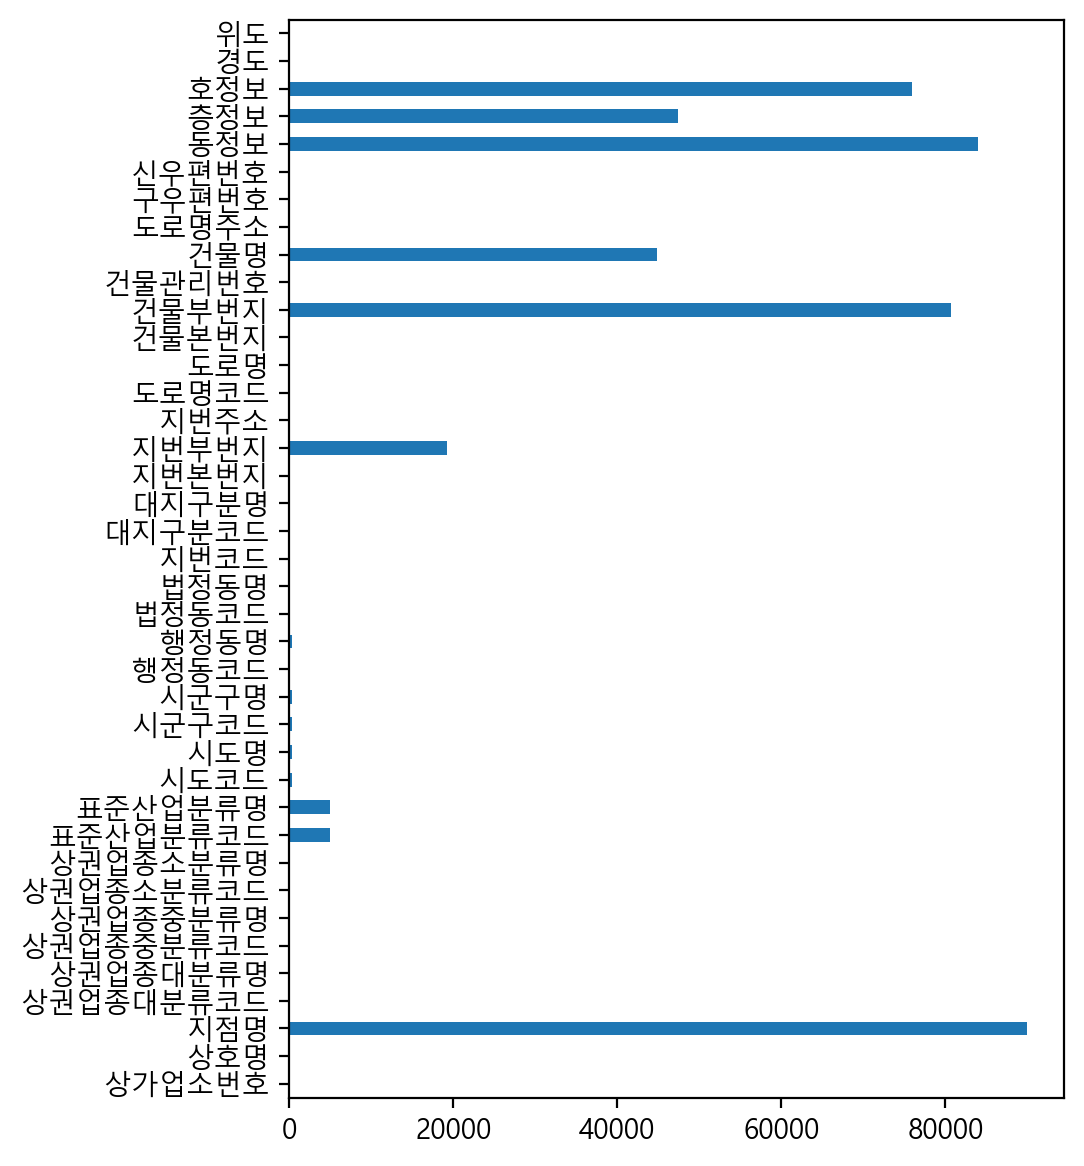

In [13]:
# 위에서 구한 결측치를 .plot.bar 를 통해 막대그래프로 표현합니다.

null_count.plot.barh(figsize=(5, 7))

In [14]:
# 위에서 계산한 결측치 수를 reset_index 를 통해 데이터프레임으로 만들어 줍니다.
# df_null_count 변수에 결과를 담아서 head 로 미리보기를 합니다.

df_null_count = null_count.reset_index()
df_null_count.head()

index      0
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

## 컬럼명 변경하기

In [15]:
# df_null_count 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치수"로 변경해 줍니다.

df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

컬럼명   결측치수
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

## 정렬하기

In [16]:
# df_null_count 데이터프레임에 있는 결측치수 컬럼을 sort_values 를 통해 정렬해서
# 결측치가 많은 순으로 상위 10개만 출력합니다.

df_null_count_top = df_null_count.sort_values(by="결측치수", ascending=False).head(10)
df_null_count_top

컬럼명   결측치수
2        지점명  89989
34       동정보  83929
28     건물부번지  80731
36       호정보  75898
35       층정보  47346
30       건물명  44882
23     지번부번지  19256
9   표준산업분류코드   4922
10   표준산업분류명   4922
11      시도코드    379

## 특정 컬럼만 불러오기

In [17]:
# 지점명 컬럼을 불러옵니다.
# NaN은 Not a Number의 약자로 결측치를 의미합니다.

df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [18]:
# "컬럼명" 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담습니다.
# tolist -> list type으로 변경

drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [19]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져옵니다.
df[drop_columns].head()

지점명  동정보  건물부번지  호정보  층정보      건물명  지번부번지 표준산업분류코드         표준산업분류명  시도코드
0  NaN  NaN    NaN  NaN  NaN  산호한양아파트    NaN   Q86201           일반 의원  41.0
1  NaN  NaN    NaN  NaN  4.0      NaN   14.0   Q86201           일반 의원  11.0
2  NaN  NaN    NaN  NaN  NaN    한라프라자    1.0   Q86201           일반 의원  41.0
3  NaN  NaN    NaN  NaN  5.0      NaN    1.0      NaN             NaN  26.0
4  수지점  NaN    NaN  NaN  1.0      NaN    2.0   G47811  의약품 및 의료용품 소매업  41.0

## 제거하기

In [20]:
# axis 0은 행 1은 열

print(f"제거하기 전 : {df.shape}")
df = df.drop(drop_columns, axis=1)
print(f"제거한 후 : {df.shape}")

제거하기 전 : (91335, 39)
제거한 후 : (91335, 29)


In [21]:
# 제거 결과를 info로 통해서 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  float64
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## 기초 통계값 보기

### 기초 통계 수치

In [22]:
# 평균값
df["위도"].mean()

36.62471119236065

In [23]:
# 중앙값
df["위도"].median()

37.23465232

In [24]:
# 최댓값
df["위도"].max()

38.49965857

In [25]:
# 최솟값
df["위도"].min()

33.21928967

In [26]:
# 갯수
df["위도"].count()

91335

### 기초통계값 요약하기 - describe

* describe 를 사용하면 데이터를 요약해 볼 수 있습니다.
* 기본적으로 수치형 데이터를 요약해서 보여줍니다.
* 데이터의 갯수, 평균 표준편차, 최솟값, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.

In [27]:
# 위도를 describe로 요약해 봅니다.

df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [28]:
# 2개의 컬럼을 describe로 요약해 봅니다.

df[["위도", "경도"]].describe()

위도            경도
count  91335.000000  91335.000000
mean      36.624711    127.487524
std        1.041361      0.842877
min       33.219290    124.717632
25%       35.811830    126.914297
50%       37.234652    127.084551
75%       37.507463    128.108919
max       38.499659    130.909912

In [29]:
# describe로 문자열 데이터타입의 요약을 봅니다.
# top은 가장 많이 등장하는 값
# freq은 의료가 91335번 등장했다 라는 뜻

df.describe(include="object")

상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명    시도명  \
count   91335     91335    91335     91335    91335     91335    91335  90956   
unique  56908         1        1         5        5        34       34     17   
top        리원         S       의료       S01       병원    S02A01       약국    경기도   
freq      152     91335    91335     60774    60774     18964    18964  21374   

         시군구명   행정동명   법정동명  대지구분명                  지번주소             도로명  \
count   90956  90956  91280  91335                 91335           91335   
unique    228   2791   2822      2                 53118           16610   
top        서구    중앙동     중동     대지  서울특별시 동대문구 제기동 965-1  서울특별시 강남구 강남대로   
freq     3165   1856    874  91213                   198             326   

                        도로명주소  
count                   91335  
unique                  54031  
top     서울특별시 동대문구 약령중앙로8길 10  
freq                      198

### 중복제거한 값 보기
* unique 로 중복을 제거한 값을 보고 nunique 로 갯수를 세어봅니다.

In [30]:
# "상권업종대분류명"

df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [31]:
df["상권업종대분류명"].nunique()

1

In [32]:
# "상권업종중분류명"
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [33]:
df["상권업종중분류명"].nunique()

5

In [34]:
# "상권업종소분류명"
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [35]:
df["상권업종소분류명"].nunique()

34

In [36]:
# unique 대신 len 을 사용할 수도 있습니다.

In [37]:
len(df["상권업종소분류명"].unique())

34

In [38]:
# value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.
# 시도명을 세어봅니다.
df["시도명"].head()

0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [39]:
# 시도명을 세어봅니다.

city = df["시도명"].value_counts()
city

시도명
경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: count, dtype: int64

In [40]:
# normalize=True 옵션을 사용하면 비율을 구할 수 있습니다.

city_normalize = df["시도명"].value_counts(normalize=True)
city_normalize

시도명
경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: proportion, dtype: float64

<Axes: ylabel='시도명'>

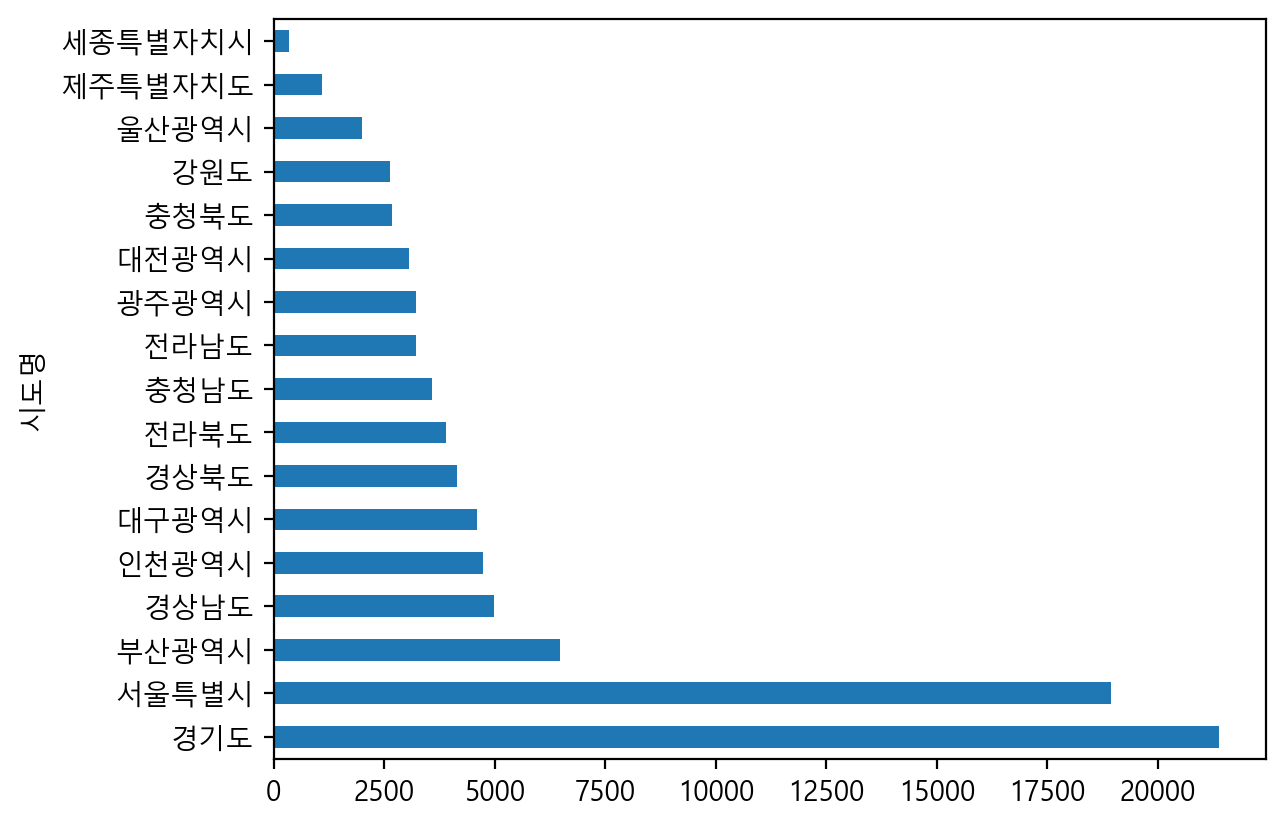

In [41]:
# pandas 에는 plot기능을 내장하고 있습니다.
# 위에서 분석한 시도명 수를 막대 그래프로 표현해 봅니다.
city.plot.barh()

<Axes: ylabel='proportion'>

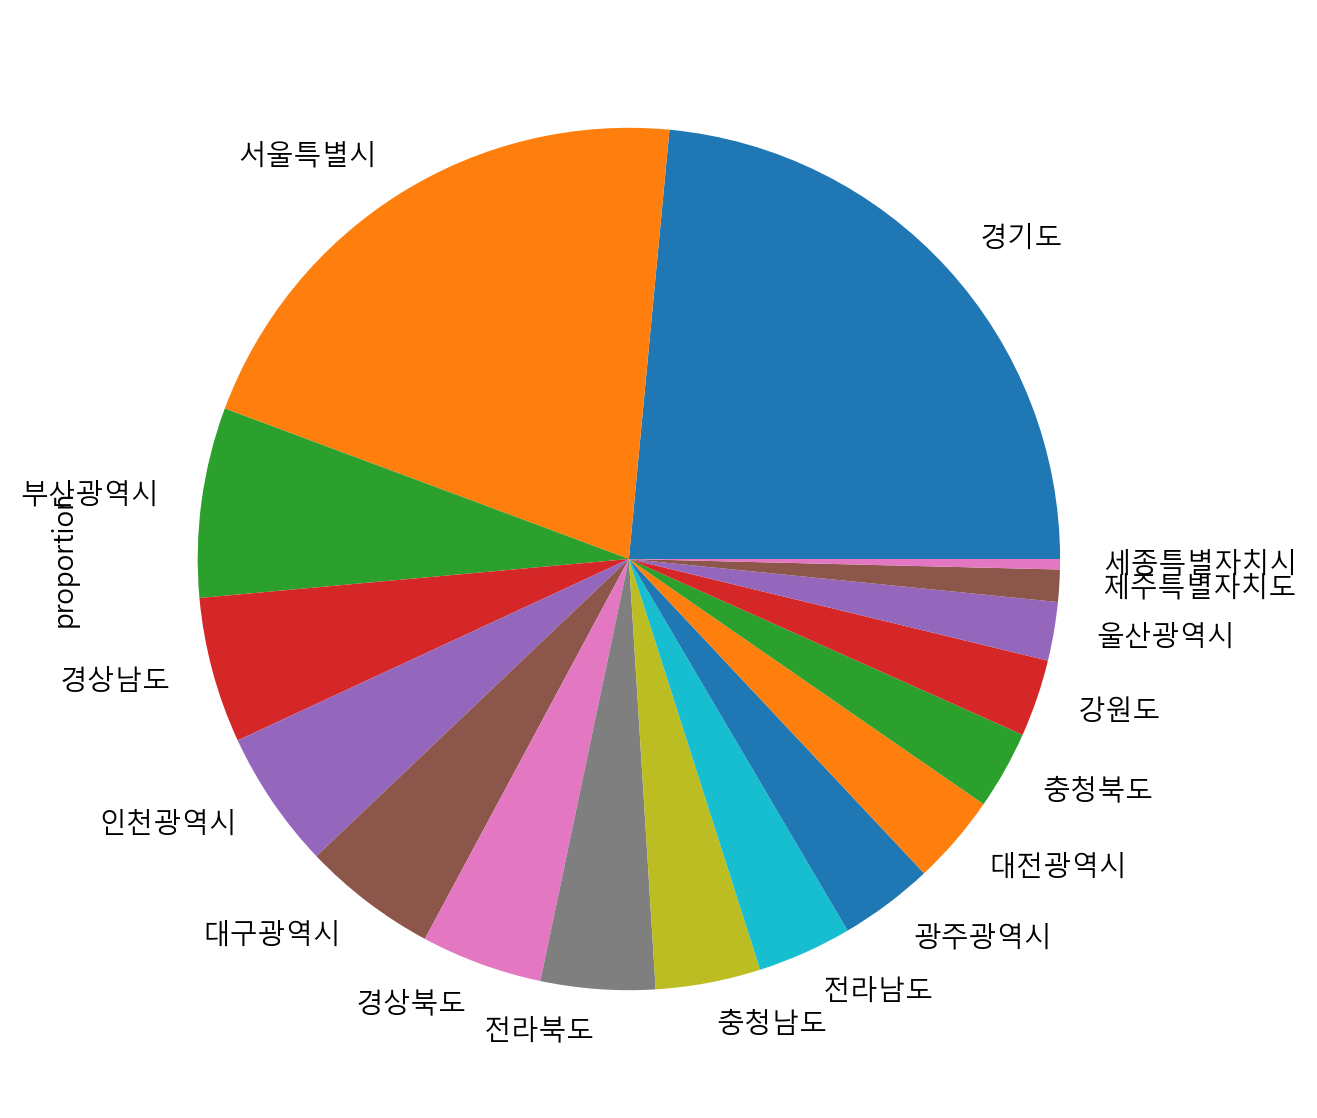

In [42]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.
city_normalize.plot.pie(figsize=(7, 7))

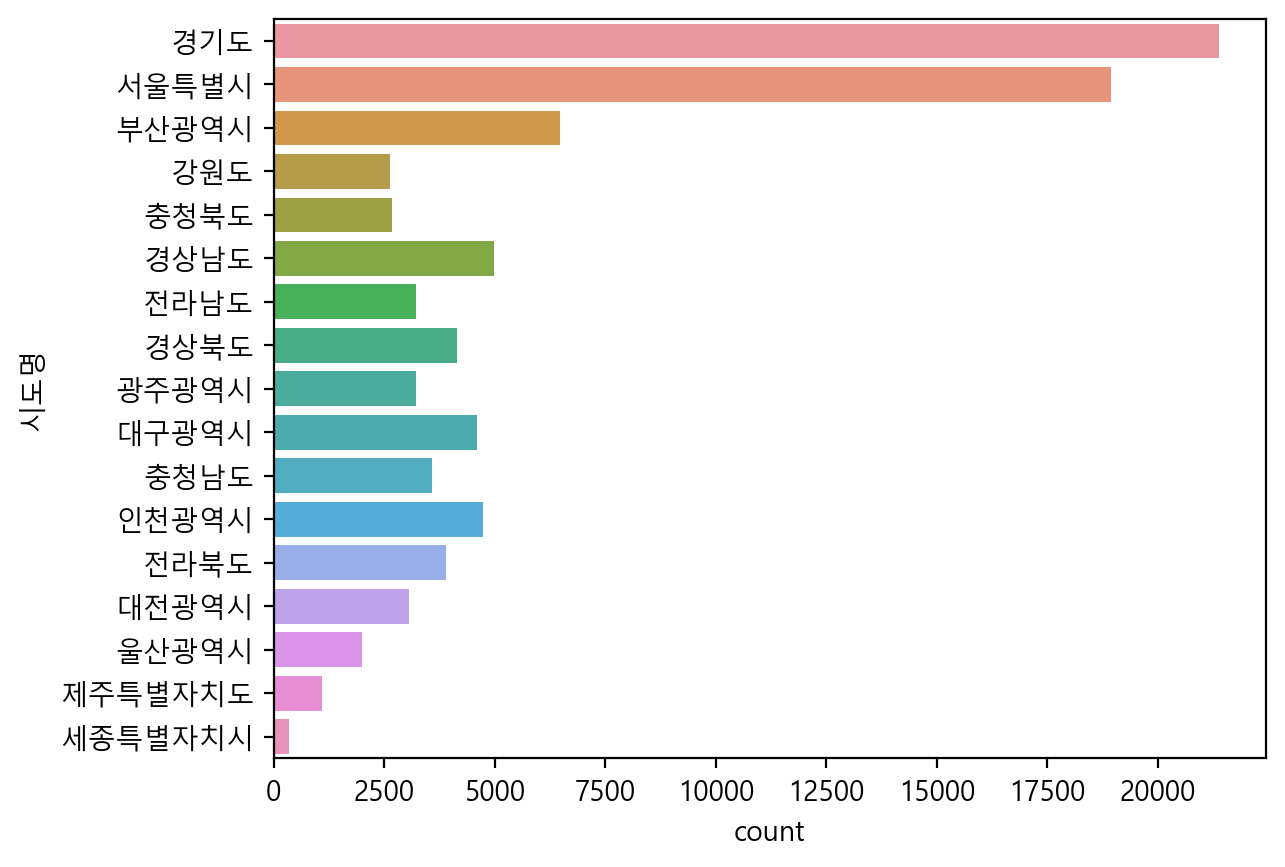

In [43]:
# seaborn 의 countplot 으로 그려봅니다.
c = sns.countplot(data=df, y="시도명")

In [44]:
# "상권업종대분류명"으로 갯수를 세어봅니다.
# value_counts 는 결측치는 제거하고 숫자를 세어줍니다.

df["상권업종대분류명"].value_counts()

상권업종대분류명
의료    91335
Name: count, dtype: int64

In [45]:
# "상권업종중분류명"으로 갯수를 세어봅니다.

c = df["상권업종중분류명"].value_counts()
c

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [46]:
# normalize=True 를 사용해 비율을 구해봅니다.
n = df["상권업종중분류명"].value_counts(normalize=True)
n

상권업종중분류명
병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: proportion, dtype: float64

<Axes: xlabel='상권업종중분류명'>

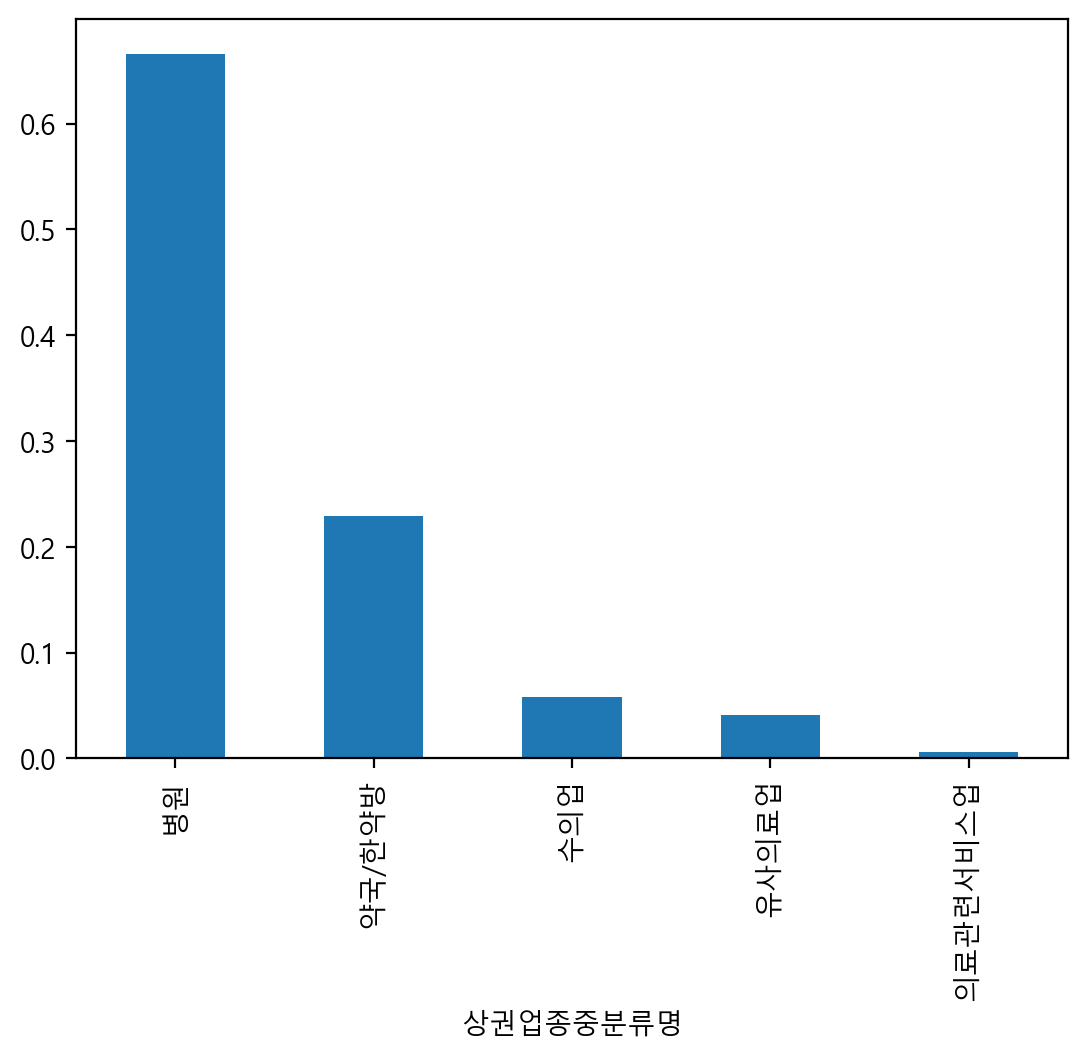

In [47]:
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다.
n.plot.bar()

<Axes: ylabel='proportion'>

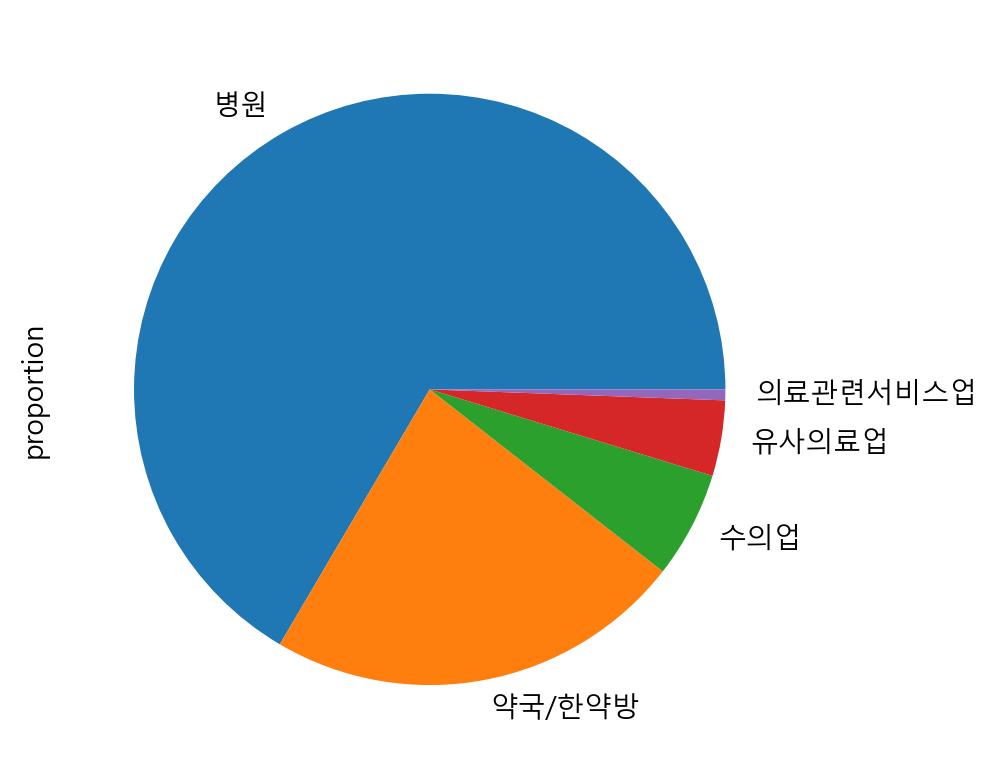

In [48]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.
n.plot.pie()

In [49]:
# "상권업종소분류명" 에 대한 그룹화 된 값을 카운트 합니다.

c = df["상권업종소분류명"].value_counts()
c

상권업종소분류명
약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: count, dtype: int64

<Axes: ylabel='상권업종소분류명'>

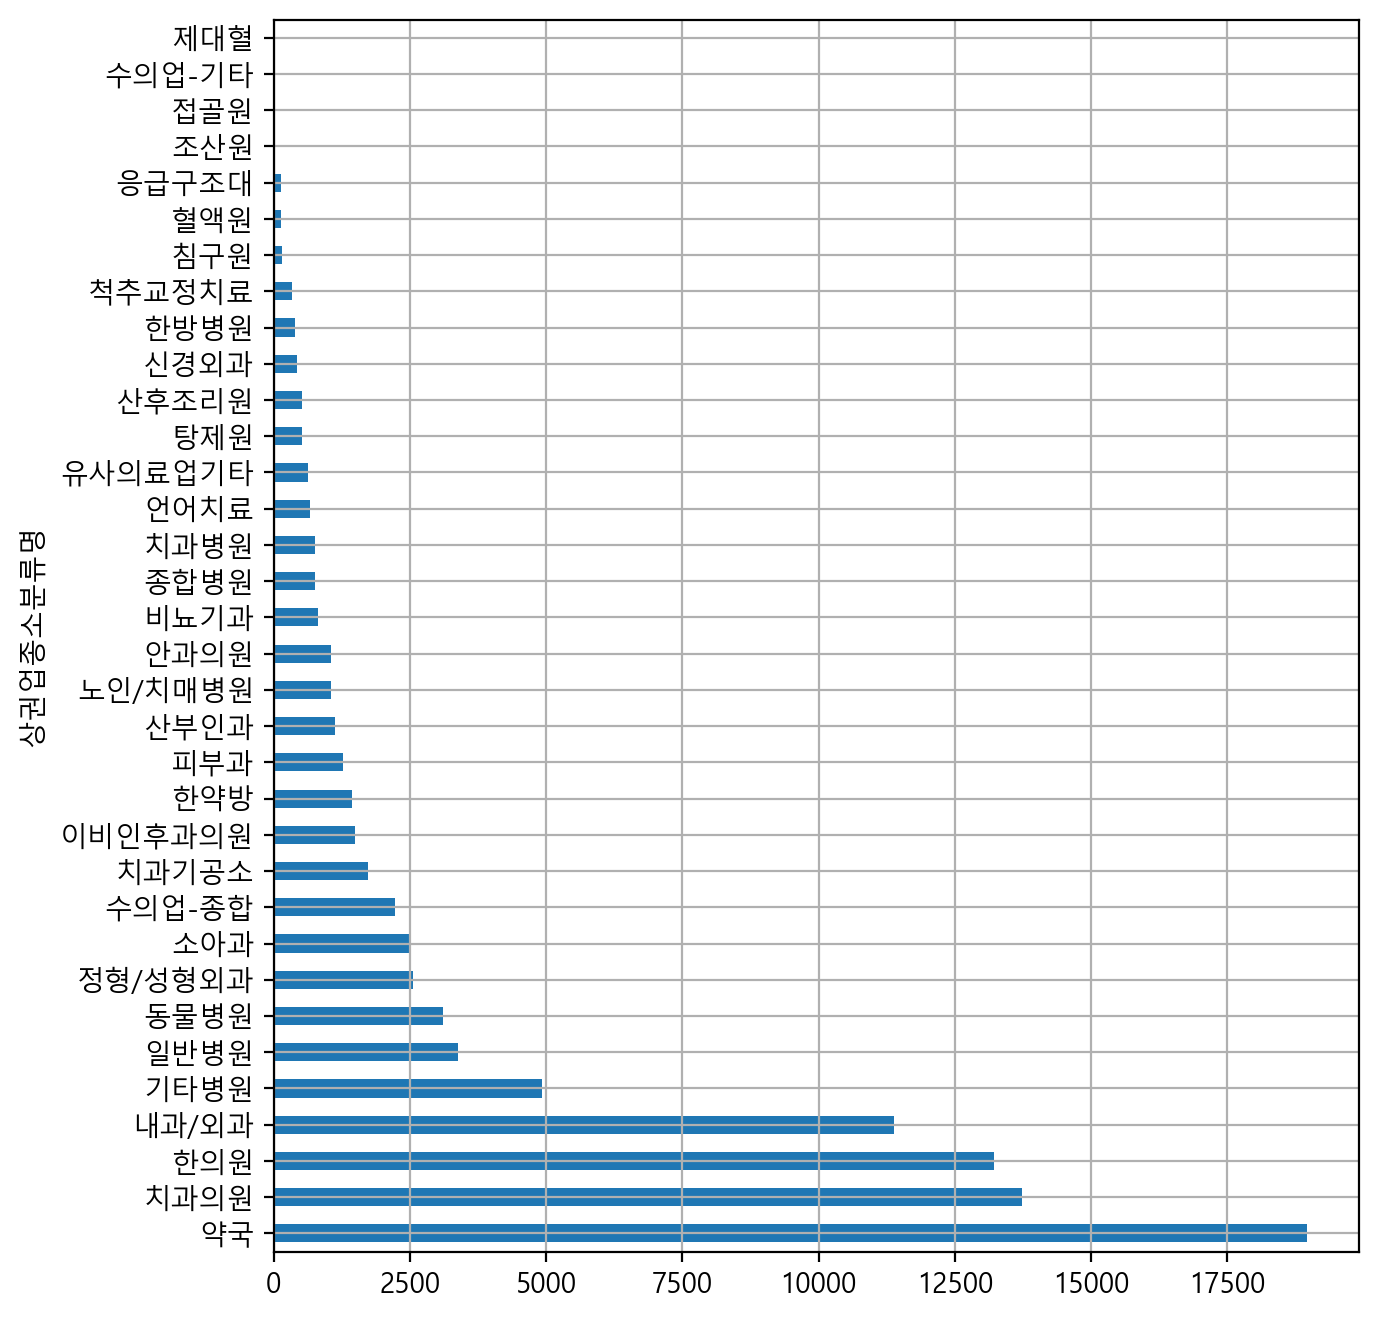

In [50]:
# "상권업종소분류명"으로 갯수를 세어봅니다.
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다.

c.plot.barh(figsize=(7, 8), grid=True)

## 데이터 색인하기
* 특정 데이터만 모아서 따로 봅니다.

In [51]:
# "상권업종중분류명"이 "약국/한약방"인 데이터만 가져와서
# df_medical 이라는 변수에 담아봅니다.
# 그리고 head()를 통해 미리보기를 합니다.

df_medical = df[df["상권업종중분류명"] == "약국/한약방"].copy()
df_medical.head(1)

상가업소번호        상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
4  20364049  더블유스토어수지점         S       의료       S02   약국/한약방    S02A01   

  상권업종소분류명  시도명    시군구코드  ...                    지번주소         도로명코드  \
4       약국  경기도  41465.0  ...  경기도 용인시 수지구 풍덕천동 712-2  4.150000e+11   

               도로명  건물본번지        건물관리번호               도로명주소     구우편번호  \
4  경기도 용인시 수지구 문정로     32  4.150000e+24  경기도 용인시 수지구 문정로 32  448170.0   

     신우편번호          경도         위도  
4  16837.0  127.095522  37.323528  

[1 rows x 29 columns]

In [52]:
# "상권업종대분류명" 에서 "의료"만 가져옵니다.
# df.loc를 사용하면 행, 열을 함께 가져올 수 있습니다.
# 이 기능을 통해 "상권업종중분류명" 만 가져옵니다.
# 그리고 가져온 결과를 value_counts 를 통해 중분류의 갯수를 세어봅니다.
m = df["상권업종대분류명"] == "의료"
df.loc[m, "상권업종중분류명"].value_counts()

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [53]:
# 유사의료업만 따로 모아봅니다.

df_medi = df[df["상권업종중분류명"] == "유사의료업"]
df_medi.shape

(3774, 29)

In [54]:
# 상호명을 그룹화해서 갯수를 세어봅니다.
# value_counts 를 사용해서 상위 10개를 출력합니다.

df["상호명"].value_counts().sort_values(ascending=False).head(10)

상호명
리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: count, dtype: int64

In [55]:
# 유사의료업만 df_medi 변수에 담겨져 있습니다.
# df_medi 변수에서 상호명을 갯수로 세어봅니다.
# 가장 많은 상호 상위 10개를 출력해 봅니다.

df_medi["상호명"].value_counts().head(10)

상호명
리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: count, dtype: int64

## 여러 조건으로 색인하기

In [56]:
# "상권업종소분류명"이 "약국" 인 것과
# "시도명"이 "서울특별시"인 데이터만 가져옵니다.
# pandas에서 and == &, or == |

df_seoul_drug = df[(df["상권업종소분류명"] == "약국") & (df["시도명"] == "서울특별시")]
print(df_seoul_drug.shape)
df_seoul_drug.head(1)

(3579, 29)


상가업소번호    상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명  \
33  20816709  이즈타워약         S       의료       S02   약국/한약방    S02A01       약국   

      시도명    시군구코드  ...               지번주소         도로명코드             도로명  \
33  서울특별시  11680.0  ...  서울특별시 강남구 역삼동 821  1.170000e+11  서울특별시 강남구 테헤란로   

    건물본번지        건물관리번호               도로명주소     구우편번호   신우편번호          경도  \
33    101  1.170000e+24  서울특별시 강남구 테헤란로 101  135080.0  6134.0  127.028023   

           위도  
33  37.498656  

[1 rows x 29 columns]

## 구별로 보기

In [57]:
# 위에서 색인한 데이터로 "시군구명"으로 그룹화 해서 갯수를 세어봅니다.
# 구별로 약국이 몇개가 있는지 확인해 봅니다.

c = df_seoul_drug["시군구명"].value_counts()
c.head()

시군구명
강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: count, dtype: int64

In [58]:
# normalize=True 를 통해 비율을 구해봅니다.
n = df_seoul_drug["시군구명"].value_counts(normalize=True)
n.head()

시군구명
강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: proportion, dtype: float64

<Axes: ylabel='시군구명'>

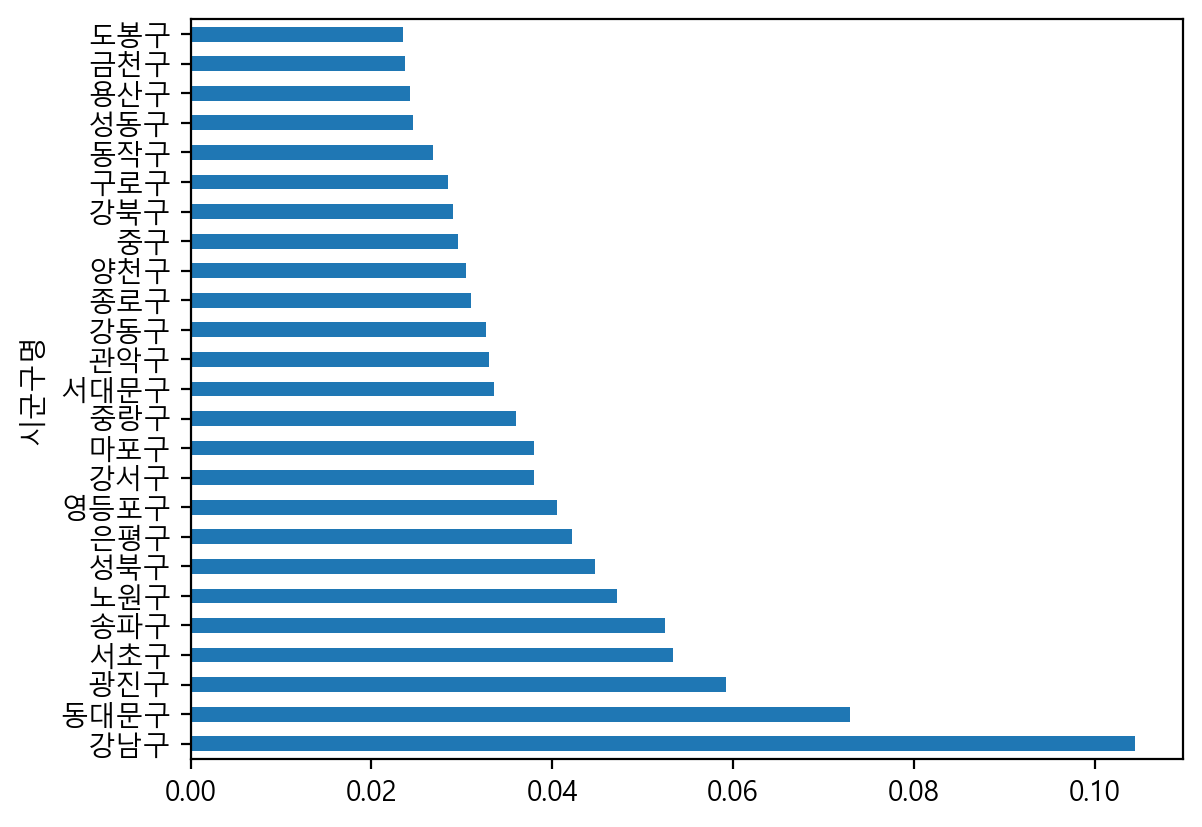

In [59]:
# 위에서 구한 결과를 판다스의 plot.bar()를 활용해 막대그래프로 그립니다.
n.plot.barh()

In [60]:
# "상권업종소분류명"이 "종합병원 인 것과
# "시도명" 이 "서울특별시" 인 데이터만 가져옵니다.
# 결과를 df_seoul_hospital 에 할당해서 재사용합니다.

df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원") & (df["시도명"] == "서울특별시")]
df_seoul_hospital.head(3)

상가업소번호     상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
305  25155642  대진의료재단         S       의료       S01       병원    S01B01   
353  20471487  홍익병원별관         S       의료       S01       병원    S01B01   
385  20737057    SNUH         S       의료       S01       병원    S01B01   

    상권업종소분류명    시도명    시군구코드  ...                  지번주소         도로명코드  \
305     종합병원  서울특별시  11215.0  ...   서울특별시 광진구 중곡동 58-25  1.120000e+11   
353     종합병원  서울특별시  11470.0  ...  서울특별시 양천구 신정동 897-13  1.150000e+11   
385     종합병원  서울특별시  11680.0  ...  서울특별시 강남구 역삼동 736-55  1.170000e+11   

                   도로명  건물본번지        건물관리번호                 도로명주소     구우편번호  \
305     서울특별시 광진구 긴고랑로    119  1.120000e+24    서울특별시 광진구 긴고랑로 119  143220.0   
353     서울특별시 양천구 국회대로    250  1.150000e+24    서울특별시 양천구 국회대로 250  158070.0   
385  서울특별시 강남구 테헤란로26길     10  1.170000e+24  서울특별시 강남구 테헤란로26길 10  135080.0   

      신우편번호          경도         위도  
305  4944.0  127.088279  37.559048  
353  7937.0  126.862805  37.529213  
385  6236.0  127.035825  37.499630  

[3 rows x 29 columns]

In [61]:
# "시군구명" 으로 그룹화 해서 구별로 종합병원의 수를 세어봅니다.
df_seoul_hospital["시군구명"].value_counts()

시군구명
강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: count, dtype: int64

## 텍스트 데이터 색인하기

In [62]:
# 색인하기 전에 상호명 중에 종합병원이 아닌 데이터를 찾아봅니다.
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"), "상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [63]:
# 상호명에서 특정 단어가 들어가는 데이터만 가져옵니다. - 꽃배달
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

상가업소번호            상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
2803  20895655  서울성모병원장례식장꽃배달         S       의료       S01       병원    S01B01   
4644  22020310  강남성모병원장례식장꽃배달         S       의료       S01       병원    S01B01   

     상권업종소분류명    시도명    시군구코드  ...                 지번주소         도로명코드  \
2803     종합병원  서울특별시  11650.0  ...    서울특별시 서초구 반포동 551  1.170000e+11   
4644     종합병원  서울특별시  11650.0  ...  서울특별시 서초구 반포동 547-6  1.170000e+11   

                    도로명  건물본번지        건물관리번호                    도로명주소  \
2803  서울특별시 서초구 사평대로28길     55  1.170000e+24     서울특별시 서초구 사평대로28길 55   
4644  서울특별시 서초구 반포대로39길     56  1.170000e+24  서울특별시 서초구 반포대로39길 56-24   

         구우편번호   신우편번호          경도         위도  
2803  137040.0  6578.0  127.000682  37.498257  
4644  137040.0  6578.0  127.001756  37.499095  

[2 rows x 29 columns]

In [64]:
# 특정 단어가 들어가는 데이터만 가져옵니다. - 의료기
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("의료기")]

상가업소번호               상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
1917  23210677  평화드림여의도성모병원의료기매장         S       의료       S01       병원   

     상권업종소분류코드 상권업종소분류명    시도명    시군구코드  ...                지번주소  \
1917    S01B01     종합병원  서울특별시  11560.0  ...  서울특별시 영등포구 여의도동 62   

             도로명코드             도로명  건물본번지        건물관리번호              도로명주소  \
1917  1.160000e+11  서울특별시 영등포구 63로     10  1.160000e+24  서울특별시 영등포구 63로 10   

         구우편번호   신우편번호          경도         위도  
1917  150713.0  7345.0  126.936693  37.518296  

[1 rows x 29 columns]

In [65]:
# "꽃배달|의료기|장례식장|상담소|어린이집" 은 종합병원과 무관하기 때문에
# 전처리를 위해 해당 텍스트를 한 번에 검색합니다.
# 제거할 데이터의 인덱스만 drop_row 에 담아주고 list 형태로 변환합니다.

drop_row = df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index
drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [66]:
# 의원으로 끝나는 데이터도 종합병원으로 볼 수 없기 때문에 인덱스를 찾아서
# drop_row2에 담아주고 list 형태로 변환합니다.
drop_row2 = df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("의원")].index
drop_row2 = list(drop_row2)
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [67]:
# 삭제할 행을 drow_row에 합쳐줍니다.
drop_row = drop_row + drop_row2
len(drop_row)

33

In [68]:
# 해당 셀을 삭제하고 삭제 전과 후의 행의 갯수를 비교합니다.
print(f"삭제 전 행 갯수: {df_seoul_hospital.shape}")
print("-------------------------")
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis=0)
print(f"삭제 후 행 갯수: {df_seoul_hospital.shape}")  

삭제 전 행 갯수: (91, 29)
-------------------------
삭제 후 행 갯수: (58, 29)


<Axes: xlabel='시군구명', ylabel='count'>

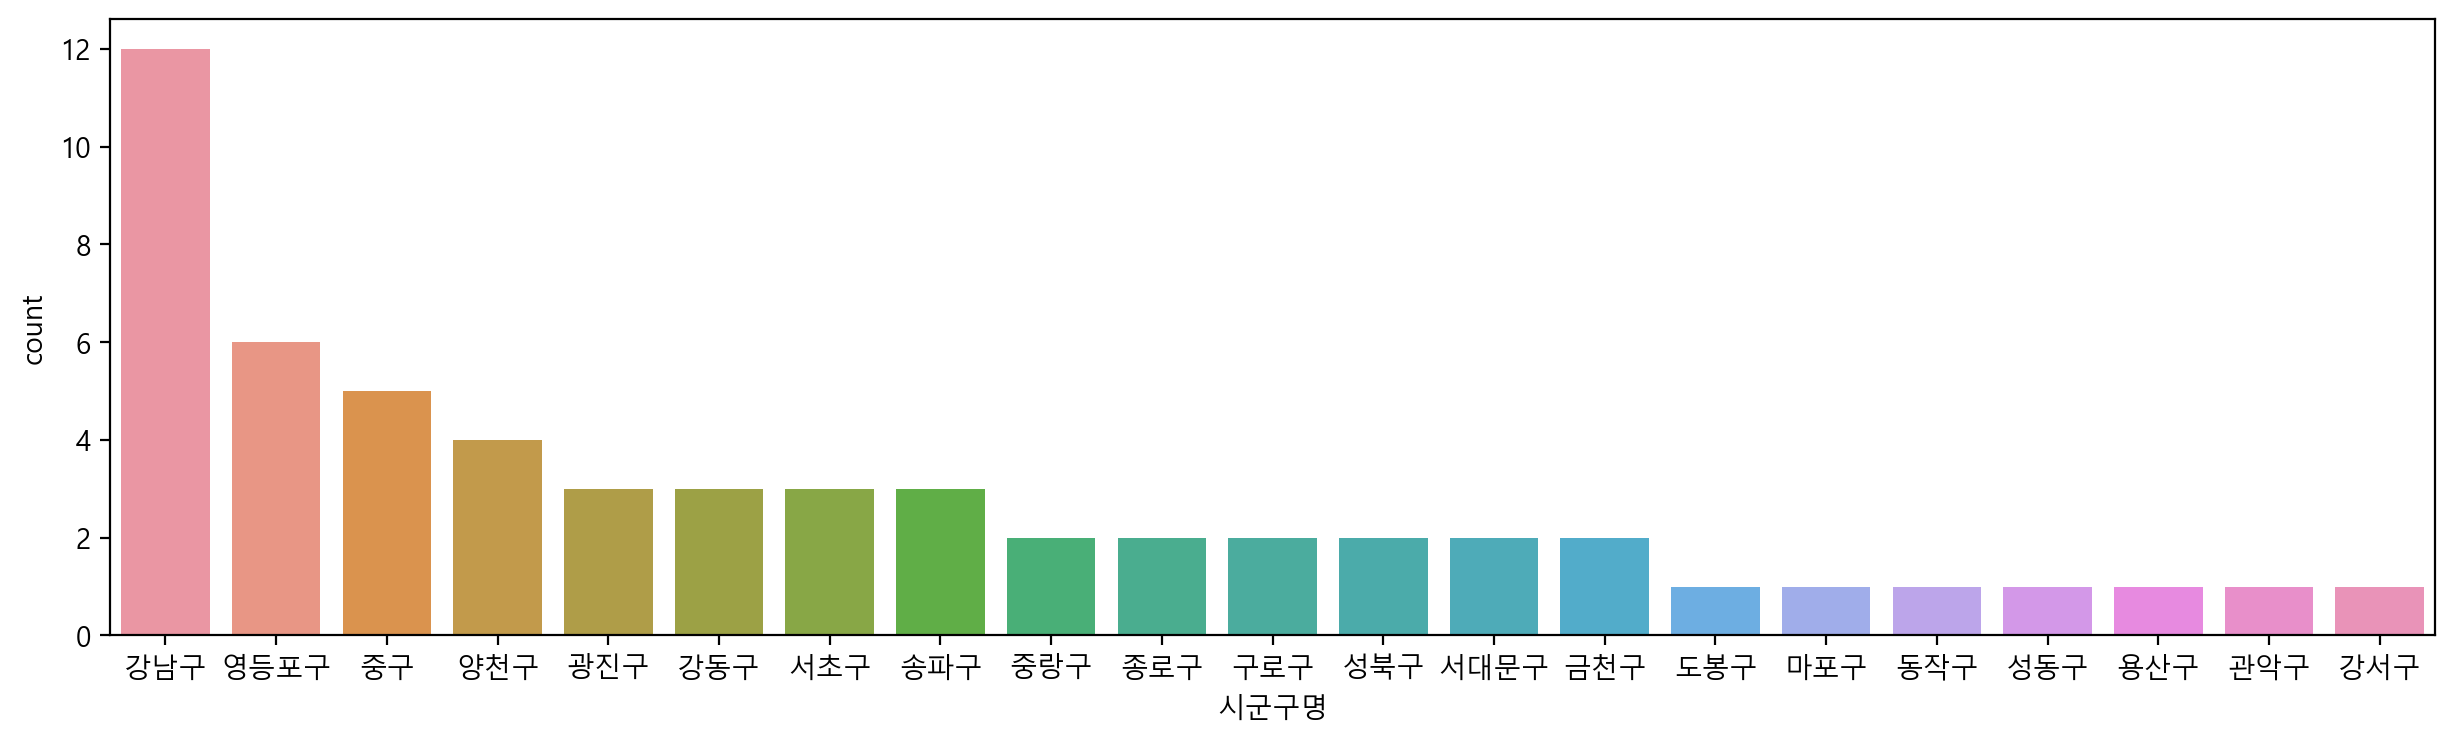

In [69]:
# 시군구명에 따라 종합병원의 숫자를 countplot으로 그립니다.
plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul_hospital, x="시군구명", order=df_seoul_hospital["시군구명"].value_counts().index)

In [70]:
df_seoul_hospital["상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원',
       '한국건강관리협회서울특', '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', 'Y&T성모마취과',
       '영남의료재단', '인제대학교서울백병원', '한국필의료재단', '사랑의병원', '성삼의료재단미즈메디병원',
       '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

## 특정 지역만 보기

In [85]:
# 서울에 있는 데이터의 위도와 경도를 봅니다.
# 결과를 df_seoul 이라는 데이터프레임에 저장합니다.
# 새로운 변수에 데이터프레임을 저장시 copy()를 사용합니다.
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(18943, 29)

<Axes: xlabel='시군구명', ylabel='count'>

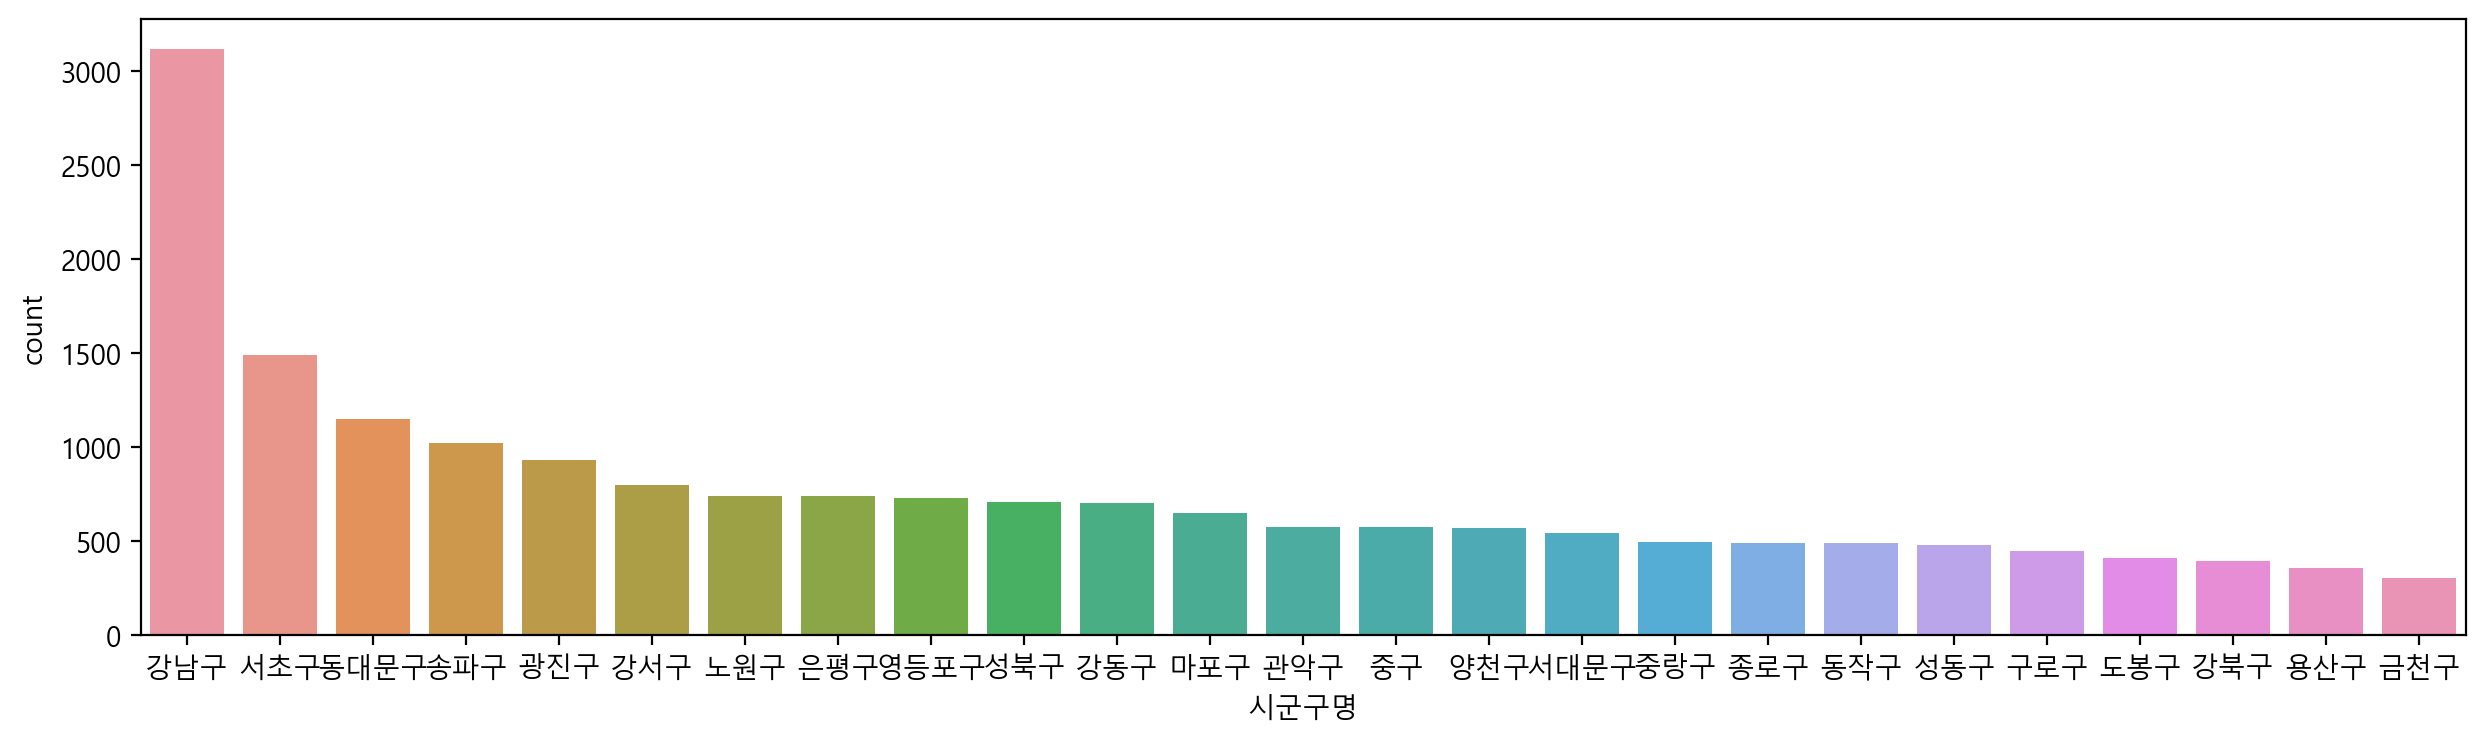

In [91]:
# seaborn 의 countplot 을 사용해서 위에서 만든 df_seoul 데이터프레임의
# 시군구명을 시각화 합니다
plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul, x="시군구명", order=df_seoul["시군구명"].value_counts().index)

<Axes: xlabel='경도', ylabel='위도'>

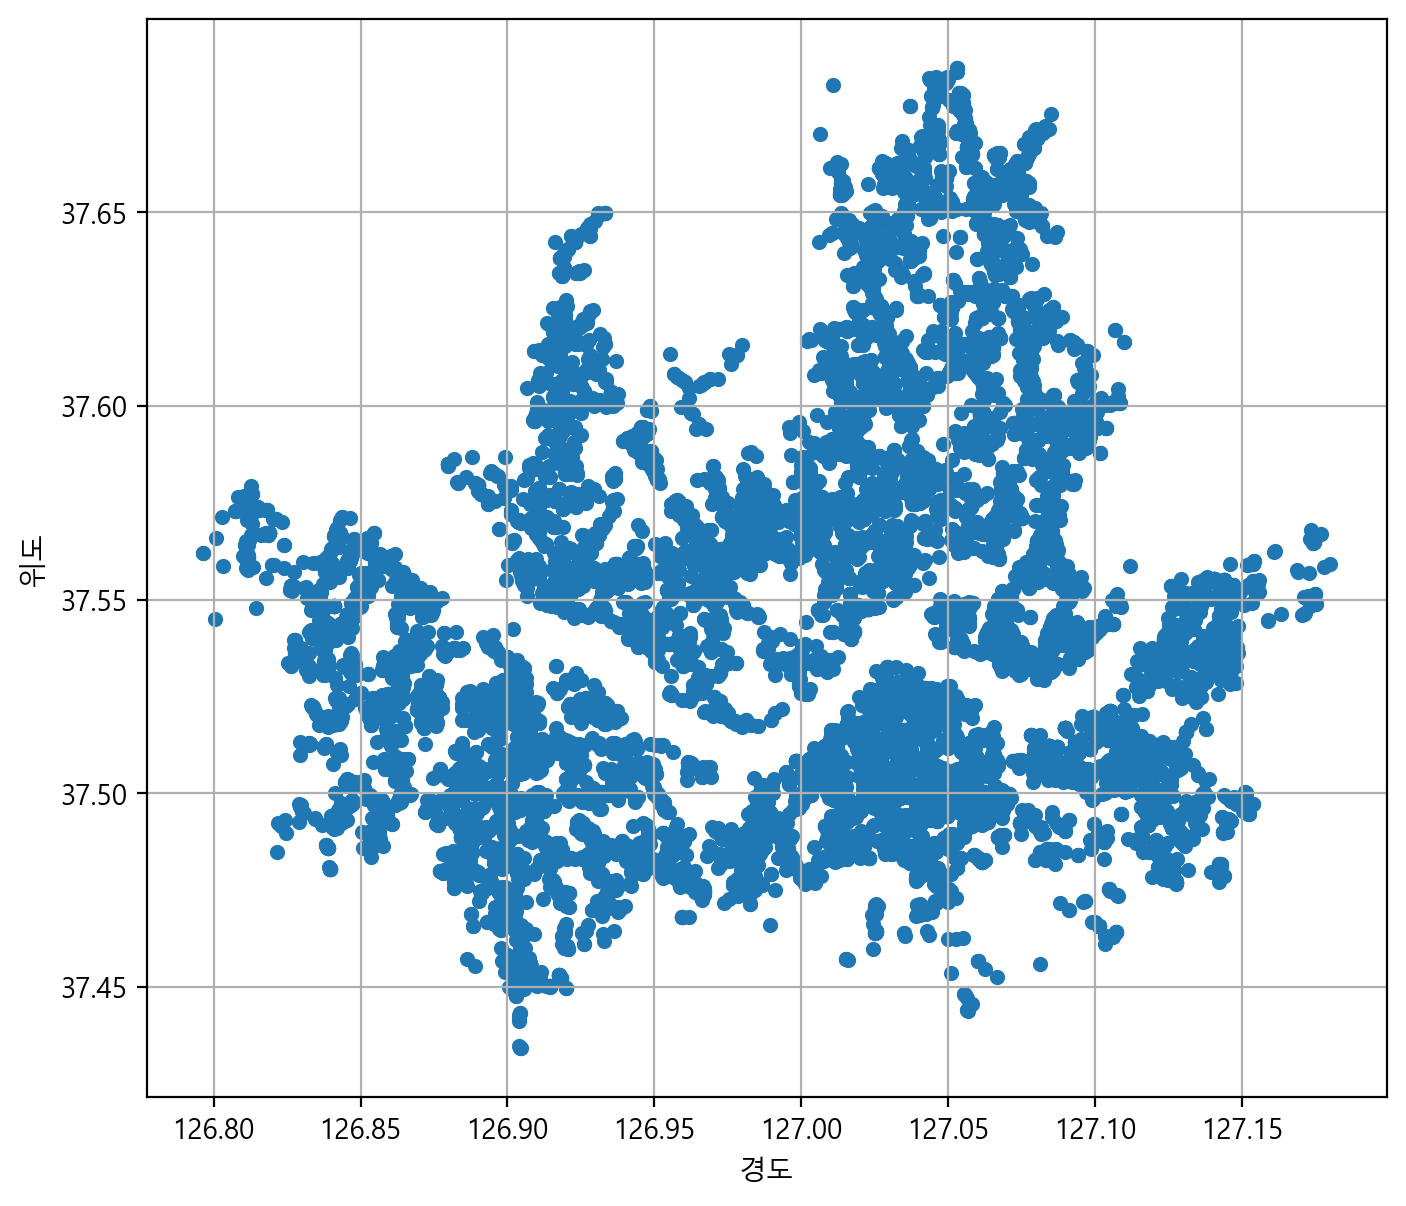

In [97]:
# pandas 의 plot.scatter 를 통해 경도와 위도를 표시해 봅니다.
df_seoul[["경도", "위도", "시군구명"]].plot.scatter(x="경도", y="위도", figsize=(8, 7), grid=True)

<Axes: xlabel='경도', ylabel='위도'>

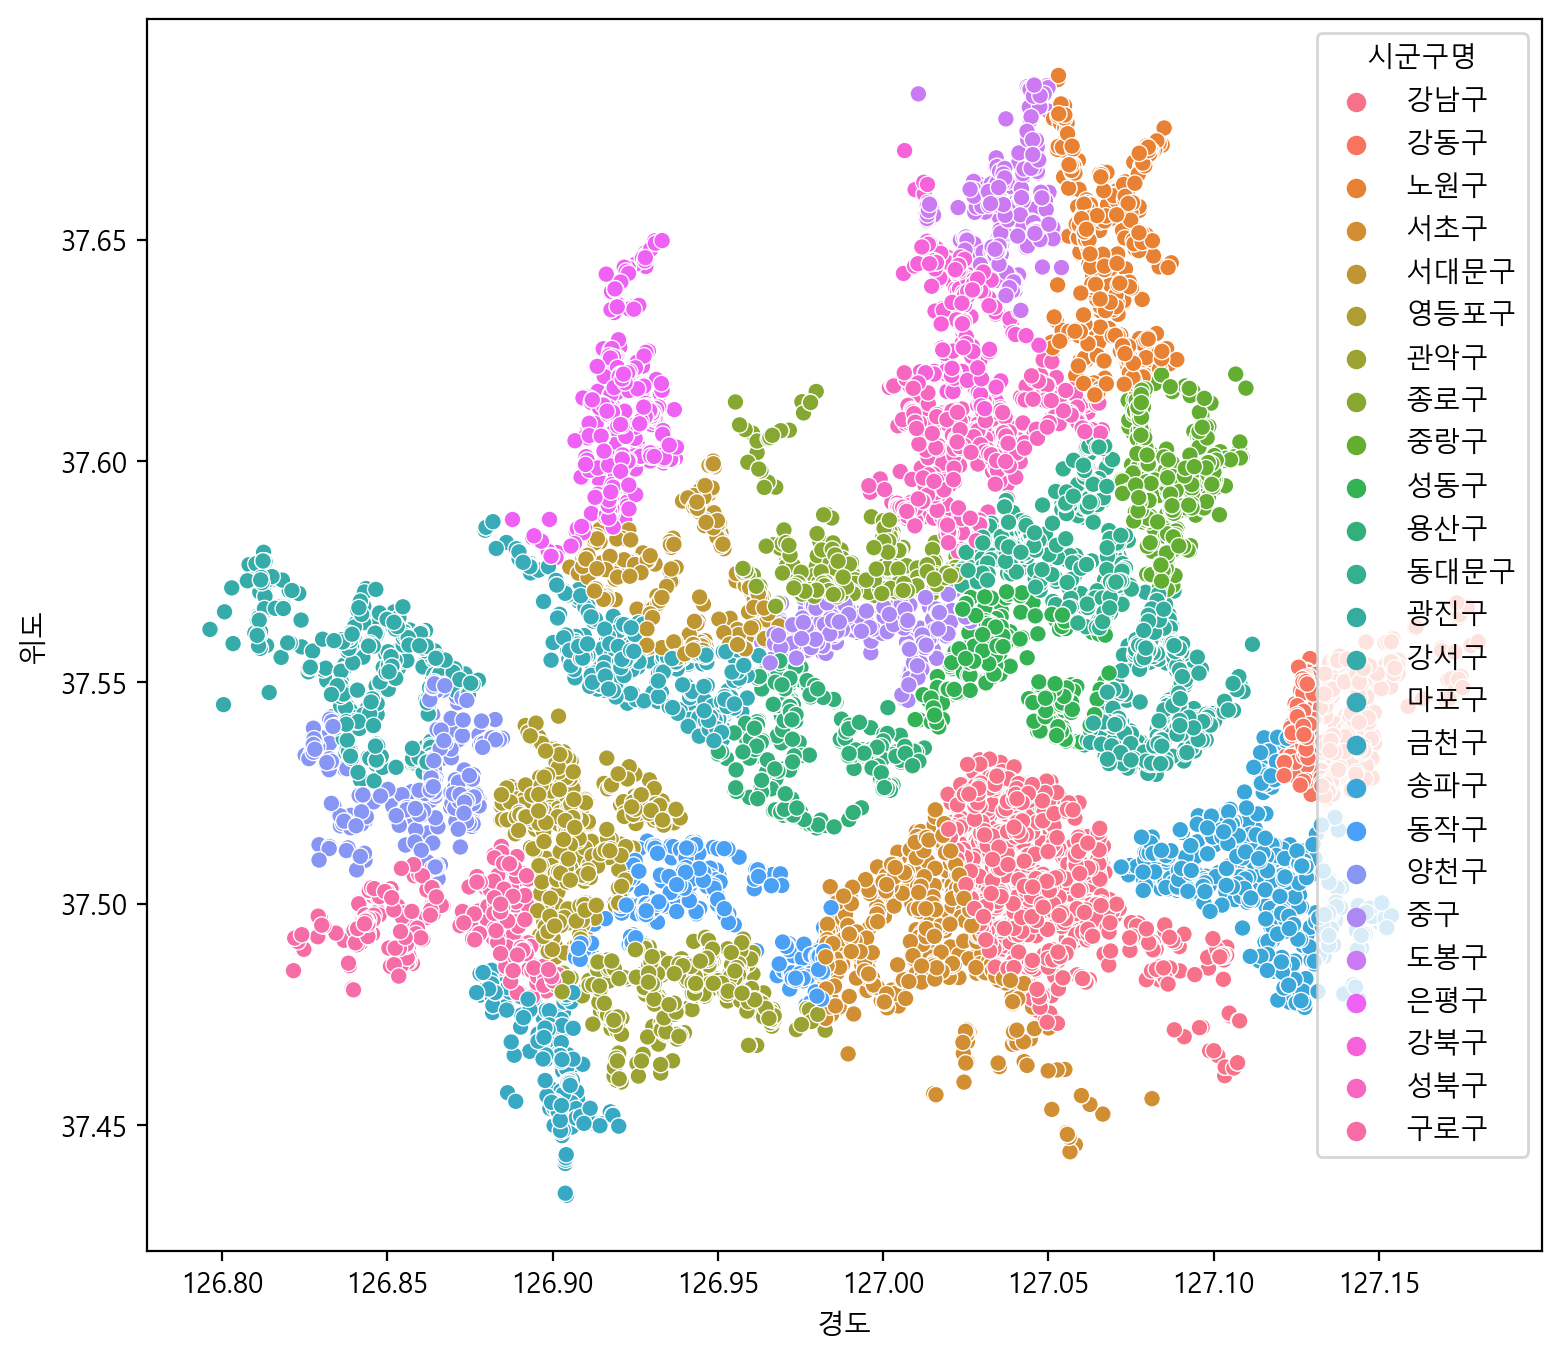

In [103]:
# seaborn의 scatterplot 을 통해 구별 경도와 위도를 표시해 봅니다.
# hue -> 색상
plt.figure(figsize=(9, 8))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="시군구명")

<Axes: xlabel='경도', ylabel='위도'>

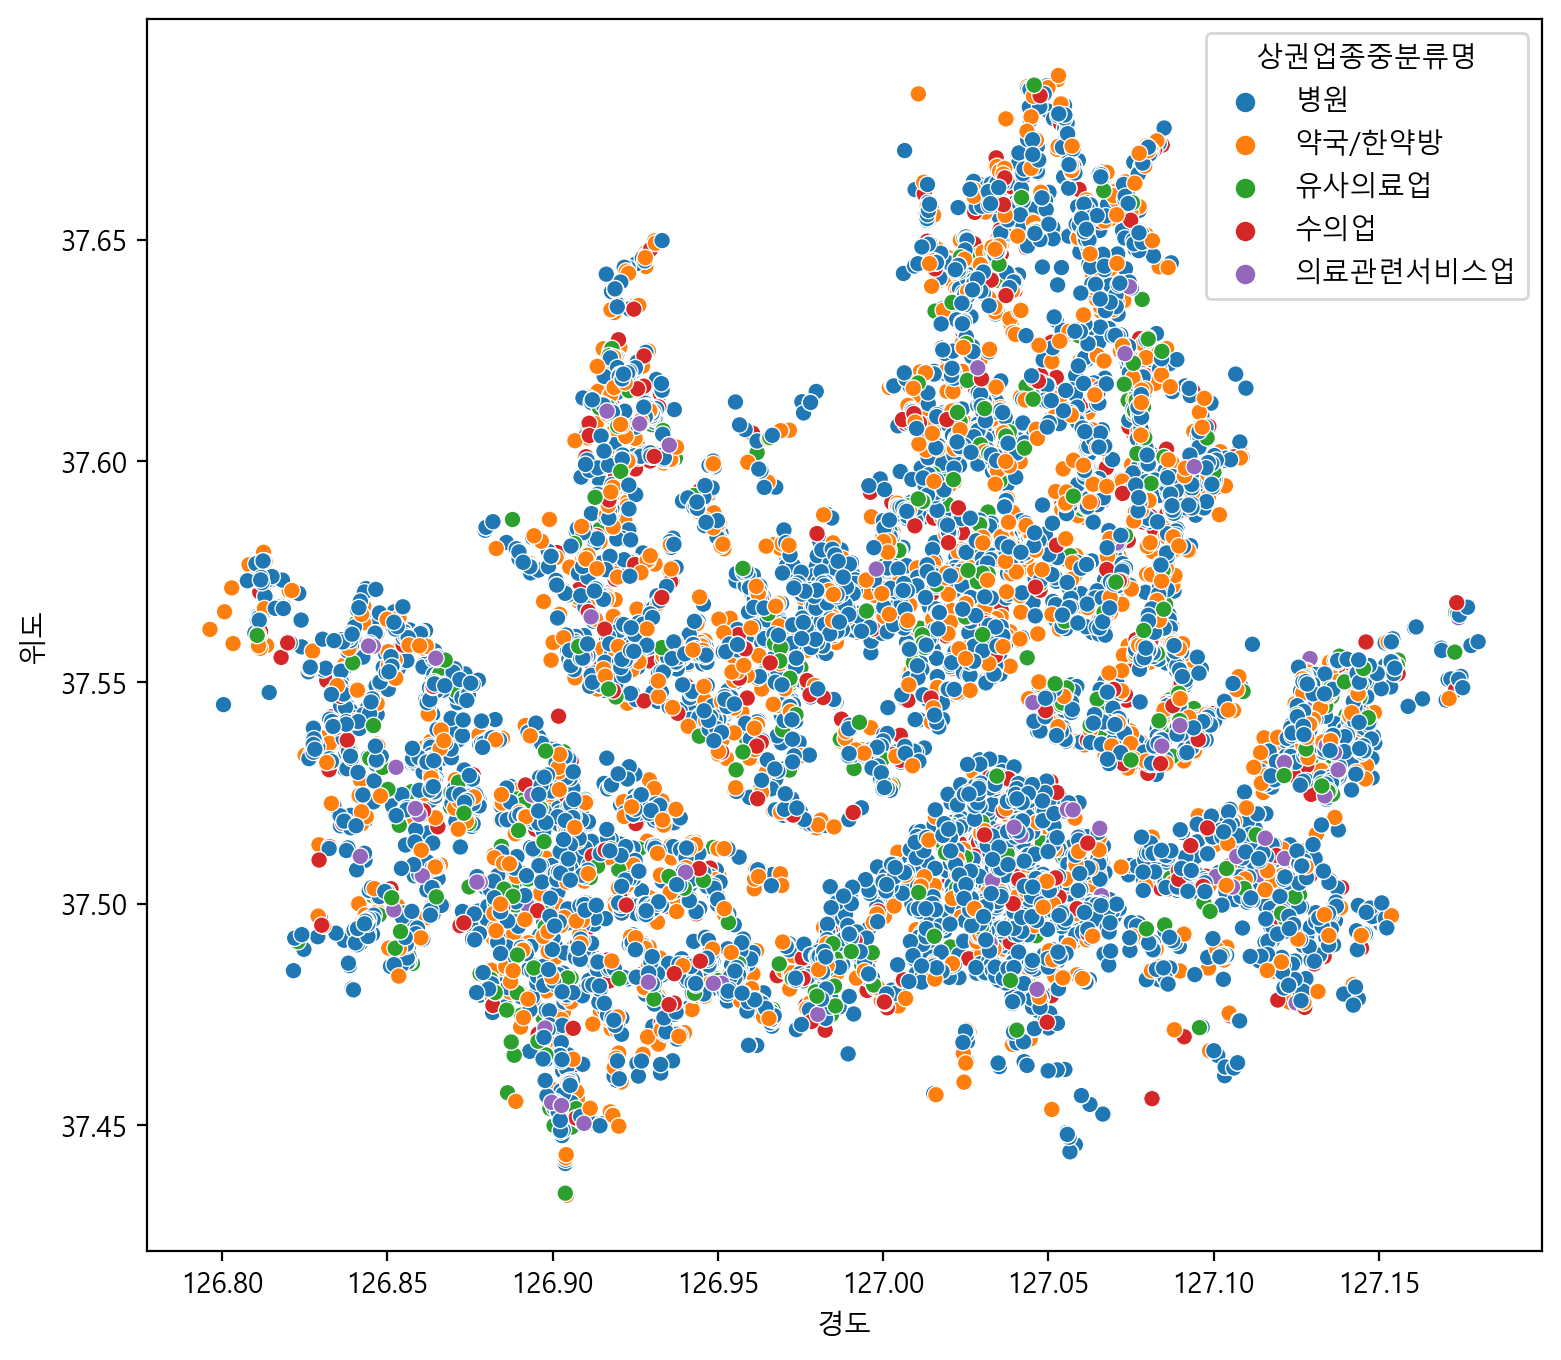

In [107]:
# seaborn의 scatterplot 을 통해 "상권업종중분류명" 경도와 위도를 표시해 봅니다.

plt.figure(figsize=(9, 8))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="상권업종중분류명")

<Axes: xlabel='경도', ylabel='위도'>

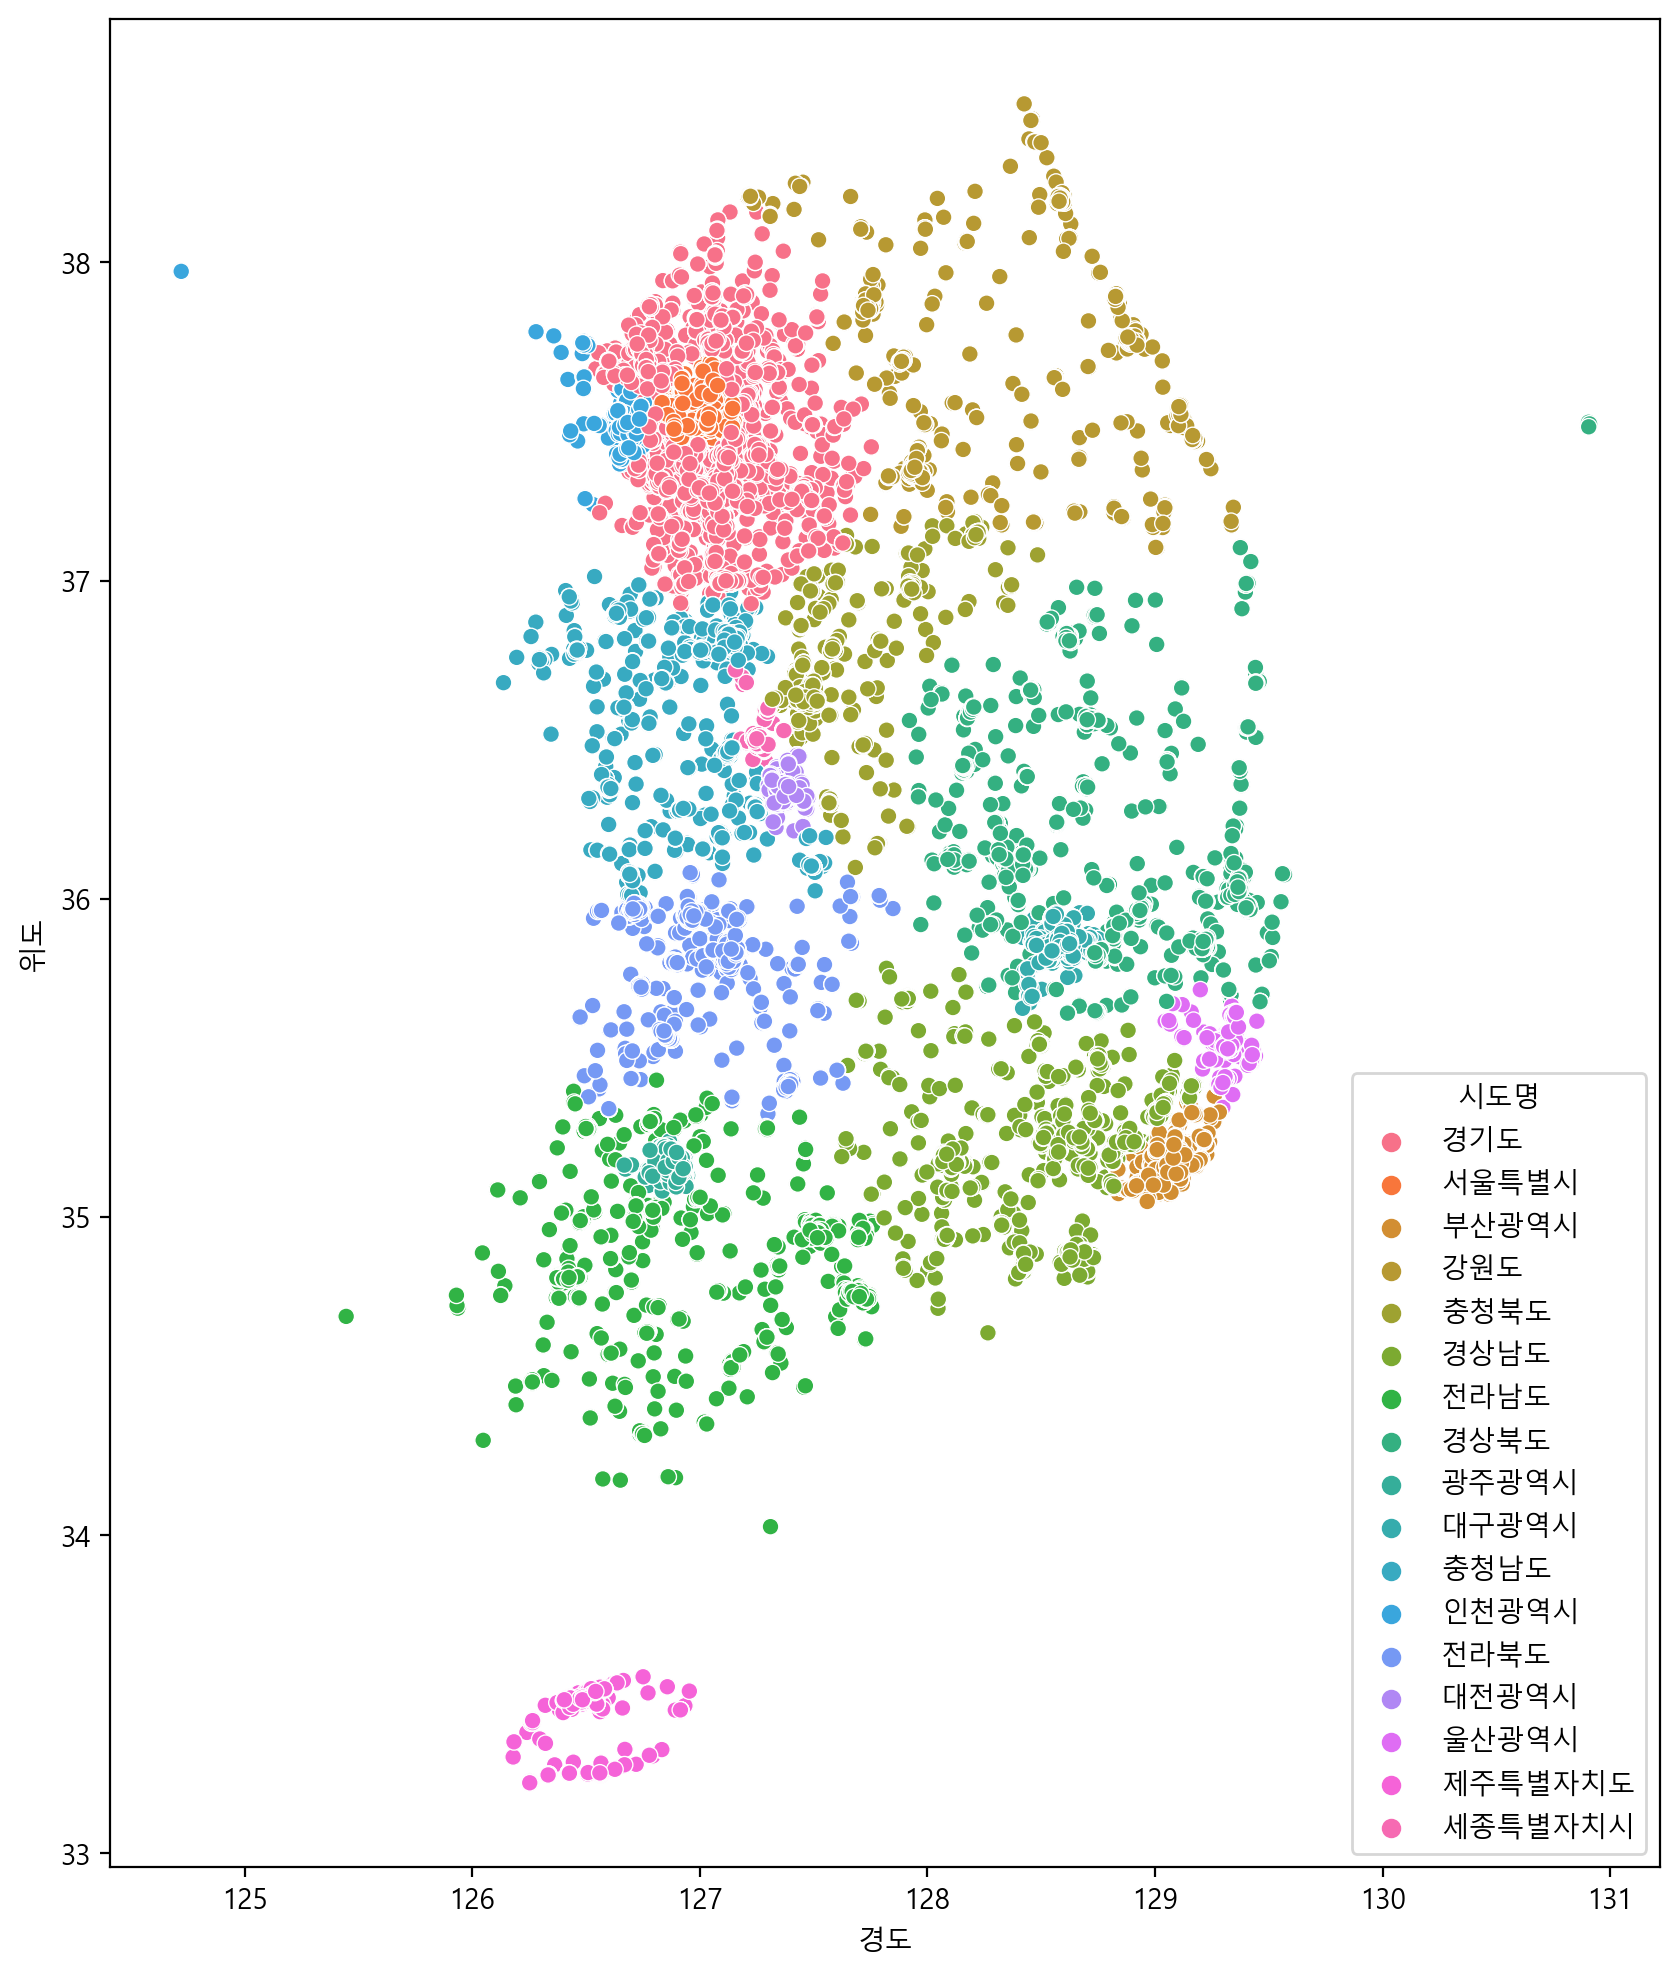

In [116]:
# seaborn의 scatterplot 을 통해 전국 데이터(df)로 구별 경도와 위도를 표시해 봅니다.

plt.figure(figsize=(10, 12))
sns.scatterplot(data=df, x="경도", y="위도", hue="시도명")

## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.

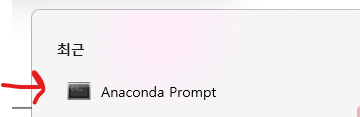
* 검은색 프롬프트 창에 아래 명령어를 통해 folium 을 설치합니다.
* conda install -c conda-forge folium

## Folium 사용 예제
* http://nbviewer.jupyter.org/github/python-visualization/folium/tree/main/examples/

In [125]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium
# 지도 시각화를 위한 라이브러리
import folium

In [129]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다.
df_seoul_hospital["위도"].mean()
df_seoul_hospital["경도"].mean()

126.9963589362069

In [143]:
df_seoul_hospital.tail(1)

상가업소번호     상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
90788  16162338  성베드로병원         S       의료       S01       병원    S01B01   

      상권업종소분류명    시도명    시군구코드  ...                  지번주소         도로명코드  \
90788     종합병원  서울특별시  11680.0  ...  서울특별시 강남구 도곡동 910-27  1.170000e+11   

                   도로명  건물본번지        건물관리번호                 도로명주소     구우편번호  \
90788  서울특별시 강남구 남부순환로   2649  1.170000e+24  서울특별시 강남구 남부순환로 2649  135859.0   

        신우편번호          경도         위도  
90788  6271.0  127.039567  37.485604  

[1 rows x 29 columns]

In [150]:
map = folium.Map(location=[df_seoul_hospital["위도"].mean(), df_seoul_hospital["경도"].mean()], zoom_start=12)

for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n, "상호명"]
    address = df_seoul_hospital.loc[n, "도로명주소"]
    popup = f"{name}-{address}"
    location = [df_seoul_hospital.loc[n, "위도"], df_seoul_hospital.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)

map